# Using the metrics data to create indexes 

In [1]:
import pandas as pd
import json

### Reading Metric JSON and neighbourhood files

In [2]:
neighborhood_path = r"C:\Users\niall\OneDrive\Documents\UCD\Semester 3\Data\neighbourhoods.csv"
neighborhood = pd.read_csv(neighborhood_path)

# Load metric data from JSON
json_file_path = 'metric_data.json'

# Initialize an empty list to hold JSON objects
json_objects = []

# Read the file line by line
with open(json_file_path, 'r') as file:
    for line in file:
        try:
            # Parse the JSON object and append to the list
            json_objects.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# Convert the list of JSON objects to a DataFrame
metric_data = pd.DataFrame(json_objects)

### Merging the two files and dropping the columns where there are zipcodes not seen in both sets

In [3]:
metric_data['zipcode'] = metric_data['zipcode'].astype(int)
#save the column names in metric data to a list
column_names = metric_data.columns.tolist()

print(column_names)

column_to_keep = [
    "zipcode",
    "population_density",
    "population_by_age_Total_0",
    "population_by_age_Total_1",
    "population_by_age_Total_2",
    "population_by_age_Total_3",
    "population_by_age_Total_4",
    "population_by_age_Total_5",
    "population_by_age_Total_6",
    "population_by_age_Total_7",
    "population_by_age_Total_8",
    "population_by_age_Total_9",
    "population_by_age_Total_10",
    "population_by_age_Total_11",
    "population_by_age_Total_12",
    "population_by_age_Total_13",
    "population_by_age_Total_14",
    "population_by_age_Total_15",
    "population_by_age_Total_16",
    "population_by_age_Total_17",
    "population_by_gender_Data_Male",
    "population_by_gender_Data_Female",
    "monthly_rent_including_utilities_studio_apt_Data_< $200",
    "monthly_rent_including_utilities_studio_apt_Data_$200-$299",
    "monthly_rent_including_utilities_studio_apt_Data_$300-$499",
    "monthly_rent_including_utilities_studio_apt_Data_$500-$749",
    "monthly_rent_including_utilities_studio_apt_Data_$750-$999",
    "monthly_rent_including_utilities_studio_apt_Data_$1,000+",
    "monthly_rent_including_utilities_1_b_Data_< $200",
    "monthly_rent_including_utilities_1_b_Data_$200-$299",
    "monthly_rent_including_utilities_1_b_Data_$300-$499",
    "monthly_rent_including_utilities_1_b_Data_$500-$749",
    "monthly_rent_including_utilities_1_b_Data_$750-$999",
    "monthly_rent_including_utilities_1_b_Data_$1,000+",
    "monthly_rent_including_utilities_2_b_Data_< $200",
    "monthly_rent_including_utilities_2_b_Data_$200-$299",
    "monthly_rent_including_utilities_2_b_Data_$300-$499",
    "monthly_rent_including_utilities_2_b_Data_$500-$749",
    "monthly_rent_including_utilities_2_b_Data_$750-$999",
    "monthly_rent_including_utilities_2_b_Data_$1,000+",
    "monthly_rent_including_utilities_3plus_b_Data_< $200",
    "monthly_rent_including_utilities_3plus_b_Data_$200-$299",
    "monthly_rent_including_utilities_3plus_b_Data_$300-$499",
    "monthly_rent_including_utilities_3plus_b_Data_$500-$749",
    "monthly_rent_including_utilities_3plus_b_Data_$750-$999",
    "monthly_rent_including_utilities_3plus_b_Data_$1,000+",
    "employment_status_Data_Worked Full-time With Earnings",
    "employment_status_Data_Worked Part-time With Earnings",
    "employment_status_Data_No Earnings",
    "annual_individual_earnings_Data_< $10,000",
    "annual_individual_earnings_Data_$10,000-$19,999",
    "annual_individual_earnings_Data_$20,000-$29,999",
    "annual_individual_earnings_Data_$30,000-$39,999",
    "annual_individual_earnings_Data_$40,000-$49,999",
    "annual_individual_earnings_Data_$50,000-$64,999",
    "annual_individual_earnings_Data_$65,000-$74,999",
    "annual_individual_earnings_Data_$75,000-$99,999",
    "annual_individual_earnings_Data_$100,000+",
    "0_count",
    "10_count",
    "11_count",
    "12_count",
    "13_count",
    "14_count",
    "15_count",
    "16_count",
    "17_count",
    "18_count",
    "19_count",
    "1_count",
    "20_count",
    "21_count",
    "22_count",
    "23_count",
    "2_count",
    "3_count",
    "4_count",
    "5_count",
    "6_count",
    "7_count",
    "8_count",
    "9_count",
    "Arrest (null) count",
    "Arrest ADMINISTRATIVE CODE count",
    "Arrest ADMINISTRATIVE CODES count",
    "Arrest AGRICULTURE & MRKTS LAW-UNCLASSIFIED count",
    "Arrest ALCOHOLIC BEVERAGE CONTROL LAW count",
    "Arrest ANTICIPATORY OFFENSES count",
    "Arrest ARSON count",
    "Arrest ASSAULT 3 & RELATED OFFENSES count",
    "Arrest BURGLAR'S TOOLS count",
    "Arrest BURGLARY count",
    "Arrest CANNABIS RELATED OFFENSES count",
    "Arrest CHILD ABANDONMENT/NON SUPPORT count",
    "Arrest CRIMINAL MISCHIEF & RELATED OF count",
    "Arrest CRIMINAL TRESPASS count",
    "Arrest DANGEROUS DRUGS count",
    "Arrest DANGEROUS WEAPONS count",
    "Arrest DISORDERLY CONDUCT count",
    "Arrest DISRUPTION OF A RELIGIOUS SERV count",
    "Arrest ENDAN WELFARE INCOMP count",
    "Arrest ESCAPE 3 count",
    "Arrest FELONY ASSAULT count",
    "Arrest FOR OTHER AUTHORITIES count",
    "Arrest FORGERY count",
    "Arrest FORTUNE TELLING count",
    "Arrest FRAUDS count",
    "Arrest FRAUDULENT ACCOSTING count",
    "Arrest GAMBLING count",
    "Arrest GRAND LARCENY count",
    "Arrest GRAND LARCENY OF MOTOR VEHICLE count",
    "Arrest HARRASSMENT 2 count",
    "Arrest HOMICIDE-NEGLIGENT,UNCLASSIFIE count",
    "Arrest HOMICIDE-NEGLIGENT-VEHICLE count",
    "Arrest INTOXICATED & IMPAIRED DRIVING count",
    "Arrest INTOXICATED/IMPAIRED DRIVING count",
    "Arrest JOSTLING count",
    "Arrest KIDNAPPING count",
    "Arrest KIDNAPPING & RELATED OFFENSES count",
    "Arrest MISCELLANEOUS PENAL LAW count",
    "Arrest MOVING INFRACTIONS count",
    "Arrest MURDER & NON-NEGL. MANSLAUGHTE count",
    "Arrest NYS LAWS-UNCLASSIFIED FELONY count",
    "Arrest OFF. AGNST PUB ORD SENSBLTY & count",
    "Arrest OFFENSES AGAINST PUBLIC ADMINI count",
    "Arrest OFFENSES AGAINST PUBLIC SAFETY count",
    "Arrest OFFENSES AGAINST THE PERSON count",
    "Arrest OFFENSES INVOLVING FRAUD count",
    "Arrest OFFENSES RELATED TO CHILDREN count",
    "Arrest OTHER OFFENSES RELATED TO THEF count",
    "Arrest OTHER STATE LAWS count",
    "Arrest OTHER STATE LAWS (NON PENAL LA count",
    "Arrest OTHER STATE LAWS (NON PENAL LAW) count",
    "Arrest OTHER TRAFFIC INFRACTION count",
    "Arrest PETIT LARCENY count",
    "Arrest POSSESSION OF STOLEN PROPERTY count",
    "Arrest PROSTITUTION & RELATED OFFENSES count",
    "Arrest RAPE count",
    "Arrest ROBBERY count",
    "Arrest SEX CRIMES count",
    "Arrest THEFT OF SERVICES count",
    "Arrest THEFT-FRAUD count",
    "Arrest UNAUTHORIZED USE OF A VEHICLE count",
    "Arrest VEHICLE AND TRAFFIC LAWS count"
]

metric_data = metric_data[column_to_keep]

#join the two dataframes on zipcodes and only keep the rows that both have the same zipcode
merged_df = pd.merge(neighborhood, metric_data, how='inner', left_on='zipcode', right_on='zipcode')




['zipcode', 'lat', 'lng', 'population_density', 'housing_units', 'occupied_housing_units', 'median_home_value', 'population_by_age_Male_0', 'population_by_age_Male_1', 'population_by_age_Male_2', 'population_by_age_Male_3', 'population_by_age_Male_4', 'population_by_age_Male_5', 'population_by_age_Male_6', 'population_by_age_Male_7', 'population_by_age_Male_8', 'population_by_age_Male_9', 'population_by_age_Male_10', 'population_by_age_Male_11', 'population_by_age_Male_12', 'population_by_age_Male_13', 'population_by_age_Male_14', 'population_by_age_Male_15', 'population_by_age_Male_16', 'population_by_age_Male_17', 'population_by_age_Female_0', 'population_by_age_Female_1', 'population_by_age_Female_2', 'population_by_age_Female_3', 'population_by_age_Female_4', 'population_by_age_Female_5', 'population_by_age_Female_6', 'population_by_age_Female_7', 'population_by_age_Female_8', 'population_by_age_Female_9', 'population_by_age_Female_10', 'population_by_age_Female_11', 'population_by

### Removing the cemeteries

In [4]:
# Use a regex pattern to match both 'Cemetery' and 'Cemeteries' in the 'name' column
cemetery_rows = merged_df['name'].str.contains('Cemetery|Cemeteries', na=False)

# Remove these rows
merged_df = merged_df[~cemetery_rows]


### Filling the missing values with the mean of the column

In [5]:
# Exclude 'zipcode' from the columns to process
columns_to_process = [col for col in column_to_keep if col != 'zipcode']

# Function to replace dictionary entries with NaN directly
def replace_dict_with_nan(x):
    if isinstance(x, dict):
        return None  # Replace dict with NaN
    return x

# Apply this function to clean data
merged_df[columns_to_process] = merged_df[columns_to_process].applymap(replace_dict_with_nan)

# Fill missing values (including former dictionary entries now as NaN) with the mean of each column
merged_df[columns_to_process] = merged_df[columns_to_process].fillna(merged_df[columns_to_process].mean())

# Optionally, print to confirm changes
print(merged_df[columns_to_process].head())



   population_density  population_by_age_Total_0  population_by_age_Total_1  \
0            0.161088                   0.112233                   0.111244   
1            0.289442                   0.337484                   0.321966   
2            0.243602                   0.271746                   0.193179   
3            0.266272                   0.734436                   0.670516   
4            0.289442                   0.337484                   0.321966   

   population_by_age_Total_2  population_by_age_Total_3  \
0                   0.136033                   0.143957   
1                   0.316978                   0.351792   
2                   0.194834                   0.274701   
3                   0.704569                   0.670611   
4                   0.316978                   0.351792   

   population_by_age_Total_4  population_by_age_Total_5  \
0                   0.288063                   0.506143   
1                   0.407053                   0.352

C:\Users\niall\AppData\Local\Temp\ipykernel_964\1623315578.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df[columns_to_process] = merged_df[columns_to_process].applymap(replace_dict_with_nan)


# Creating indexes

In [6]:
#Age Distribution Index: Calculate the standard deviation of age distribution columns
age_columns = [col for col in merged_df.columns if 'population_by_age_Total_' in col]
merged_df['Age_Diversity_Index'] = merged_df[age_columns].std(axis=1)


#Employment Health Index: Combine employment rates, penalize by no earnings
employment_columns = ['employment_status_Data_Worked Full-time With Earnings', 'employment_status_Data_Worked Part-time With Earnings']
merged_df['Employment_Health_Raw'] = merged_df[employment_columns].sum(axis=1)
merged_df['Employment_Health_Index'] = merged_df['Employment_Health_Raw'] / (merged_df['Employment_Health_Raw'] + merged_df['employment_status_Data_No Earnings'])



C:\Users\niall\AppData\Local\Temp\ipykernel_964\3710571697.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Age_Diversity_Index'] = merged_df[age_columns].std(axis=1)
C:\Users\niall\AppData\Local\Temp\ipykernel_964\3710571697.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Employment_Health_Raw'] = merged_df[employment_columns].sum(axis=1)
C:\Users\niall\AppData\Local\Temp\ipykernel_964\3710571697.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

In [7]:
# Annual Earnings Index
earnings_columns = [col for col in merged_df.columns if 'annual_individual_earnings_Data_' in col]
earnings_weights = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9], index=earnings_columns)  # More weight to higher earnings brackets
merged_df['Annual_Earnings_Index'] = (merged_df[earnings_columns] * earnings_weights).sum(axis=1) / earnings_weights.sum()

C:\Users\niall\AppData\Local\Temp\ipykernel_964\950052225.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Annual_Earnings_Index'] = (merged_df[earnings_columns] * earnings_weights).sum(axis=1) / earnings_weights.sum()


In [8]:
# Housing Affordability Index
# Define price brackets and corresponding columns
price_brackets = {
    '< $200': [
        'monthly_rent_including_utilities_studio_apt_Data_< $200',
        'monthly_rent_including_utilities_1_b_Data_< $200',
        'monthly_rent_including_utilities_2_b_Data_< $200',
        'monthly_rent_including_utilities_3plus_b_Data_< $200'
    ],
    '$200-$299': [
        'monthly_rent_including_utilities_studio_apt_Data_$200-$299',
        'monthly_rent_including_utilities_1_b_Data_$200-$299',
        'monthly_rent_including_utilities_2_b_Data_$200-$299',
        'monthly_rent_including_utilities_3plus_b_Data_$200-$299'
    ],
    '$300-$499': [
        'monthly_rent_including_utilities_studio_apt_Data_$300-$499',
        'monthly_rent_including_utilities_1_b_Data_$300-$499',
        'monthly_rent_including_utilities_2_b_Data_$300-$499',
        'monthly_rent_including_utilities_3plus_b_Data_$300-$499'
    ],
    '$500-$749': [
        'monthly_rent_including_utilities_studio_apt_Data_$500-$749',
        'monthly_rent_including_utilities_1_b_Data_$500-$749',
        'monthly_rent_including_utilities_2_b_Data_$500-$749',
        'monthly_rent_including_utilities_3plus_b_Data_$500-$749'
    ],
    '$750-$999': [
        'monthly_rent_including_utilities_studio_apt_Data_$750-$999',
        'monthly_rent_including_utilities_1_b_Data_$750-$999',
        'monthly_rent_including_utilities_2_b_Data_$750-$999',
        'monthly_rent_including_utilities_3plus_b_Data_$750-$999'
    ],
    '$1,000+': [
        'monthly_rent_including_utilities_studio_apt_Data_$1,000+',
        'monthly_rent_including_utilities_1_b_Data_$1,000+',
        'monthly_rent_including_utilities_2_b_Data_$1,000+',
        'monthly_rent_including_utilities_3plus_b_Data_$1,000+'
    ]
}

# Sum up values within each price bracket
for price_range, columns in price_brackets.items():
    merged_df[price_range] = merged_df[columns].sum(axis=1)

# Normalize each column to make contributions equivalent
max_values = merged_df[list(price_brackets.keys())].max()
merged_df[list(price_brackets.keys())] = merged_df[list(price_brackets.keys())].div(max_values)

# Calculate the Housing Affordability Index (higher values are more affordable)
weights = pd.Series([6, 5, 4, 3, 2, 1], index=list(price_brackets.keys()))  # Example: heavier weights for cheaper brackets
merged_df['Housing_Affordability_Score'] = (merged_df[list(price_brackets.keys())] * weights).sum(axis=1) / weights.sum()

# Normalize the index from 0 (least affordable) to 1 (most affordable)
merged_df['Housing_Affordability_Index'] = (merged_df['Housing_Affordability_Score'] - merged_df['Housing_Affordability_Score'].min()) / (merged_df['Housing_Affordability_Score'].max() - merged_df['Housing_Affordability_Score'].min())


C:\Users\niall\AppData\Local\Temp\ipykernel_964\3963242244.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[price_range] = merged_df[columns].sum(axis=1)
C:\Users\niall\AppData\Local\Temp\ipykernel_964\3963242244.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[price_range] = merged_df[columns].sum(axis=1)
C:\Users\niall\AppData\Local\Temp\ipykernel_964\3963242244.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor

In [9]:
#Crime Rate Index: Sum all crime-related metrics, then normalize
crime_columns = [col for col in merged_df.columns if 'Arrest' in col and 'count' in col]
merged_df['Total_Crime'] = merged_df[crime_columns].sum(axis=1)
max_crime = merged_df['Total_Crime'].max()  # normalization factor
merged_df['Crime_Rate_Index'] = merged_df['Total_Crime'] / max_crime

C:\Users\niall\AppData\Local\Temp\ipykernel_964\969730608.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Total_Crime'] = merged_df[crime_columns].sum(axis=1)
C:\Users\niall\AppData\Local\Temp\ipykernel_964\969730608.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Crime_Rate_Index'] = merged_df['Total_Crime'] / max_crime


In [10]:
#Age groups index
# Buckets for age groups
young_columns = [f'population_by_age_Total_{i}' for i in range(6)]  # Ages 0-5
middle_aged_columns = [f'population_by_age_Total_{i}' for i in range(6, 13)]  # Ages 6-12
old_columns = [f'population_by_age_Total_{i}' for i in range(13, 18)]  # Ages 13-17

# Sum the columns in each bucket to create total counts per age group
merged_df['Young_Index_Raw'] = merged_df[young_columns].sum(axis=1)
merged_df['Middle_Aged_Index_Raw'] = merged_df[middle_aged_columns].sum(axis=1)
merged_df['Old_Index_Raw'] = merged_df[old_columns].sum(axis=1)

# Normalize these values to get indices from 0 to 1
merged_df['Young_Index'] = merged_df['Young_Index_Raw'] / merged_df['Young_Index_Raw'].max()
merged_df['Middle_Aged_Index'] = merged_df['Middle_Aged_Index_Raw'] / merged_df['Middle_Aged_Index_Raw'].max()
merged_df['Old_Index'] = merged_df['Old_Index_Raw'] / merged_df['Old_Index_Raw'].max()



C:\Users\niall\AppData\Local\Temp\ipykernel_964\3090318022.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Young_Index_Raw'] = merged_df[young_columns].sum(axis=1)
C:\Users\niall\AppData\Local\Temp\ipykernel_964\3090318022.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Middle_Aged_Index_Raw'] = merged_df[middle_aged_columns].sum(axis=1)
C:\Users\niall\AppData\Local\Temp\ipykernel_964\3090318022.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

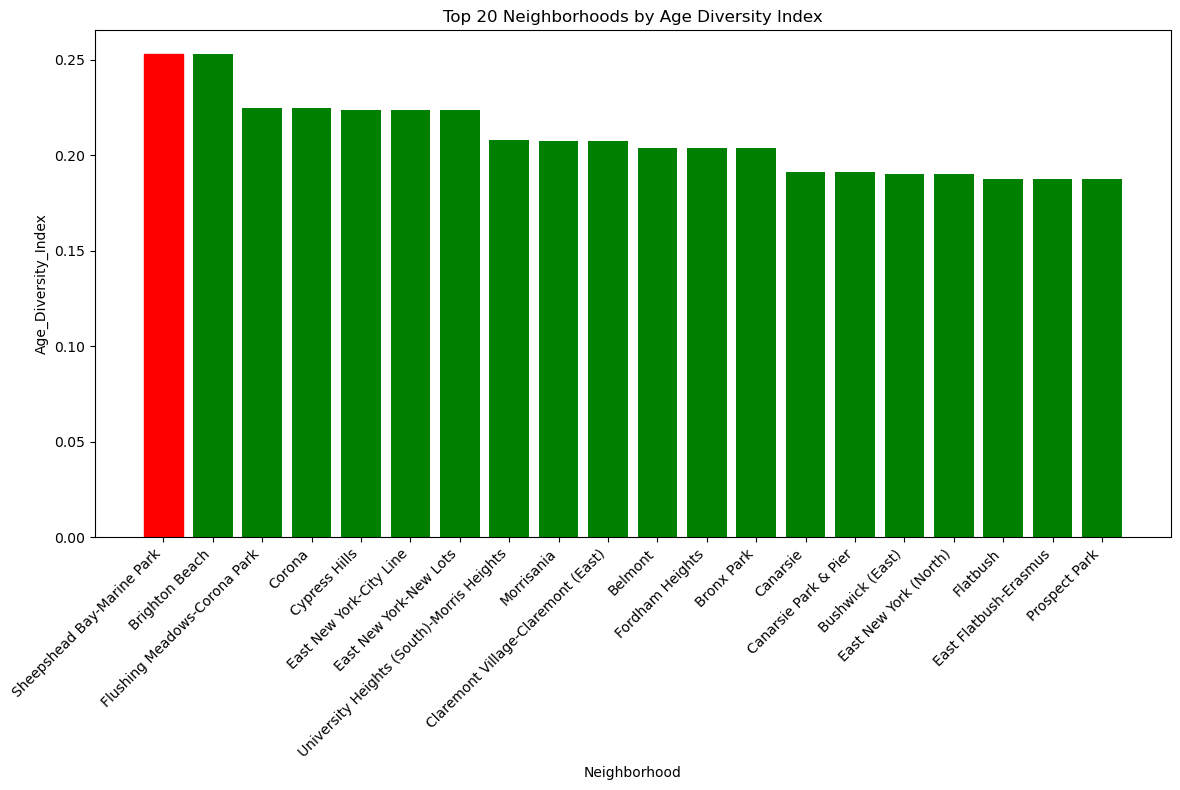

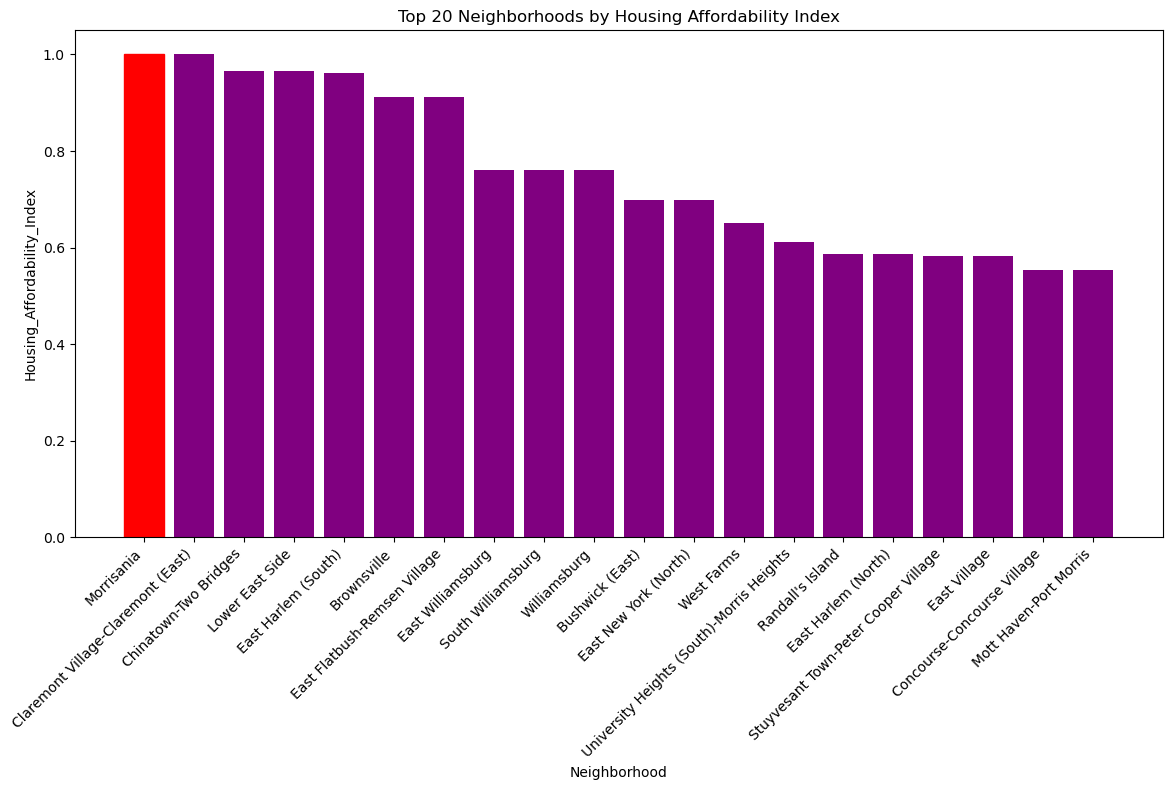

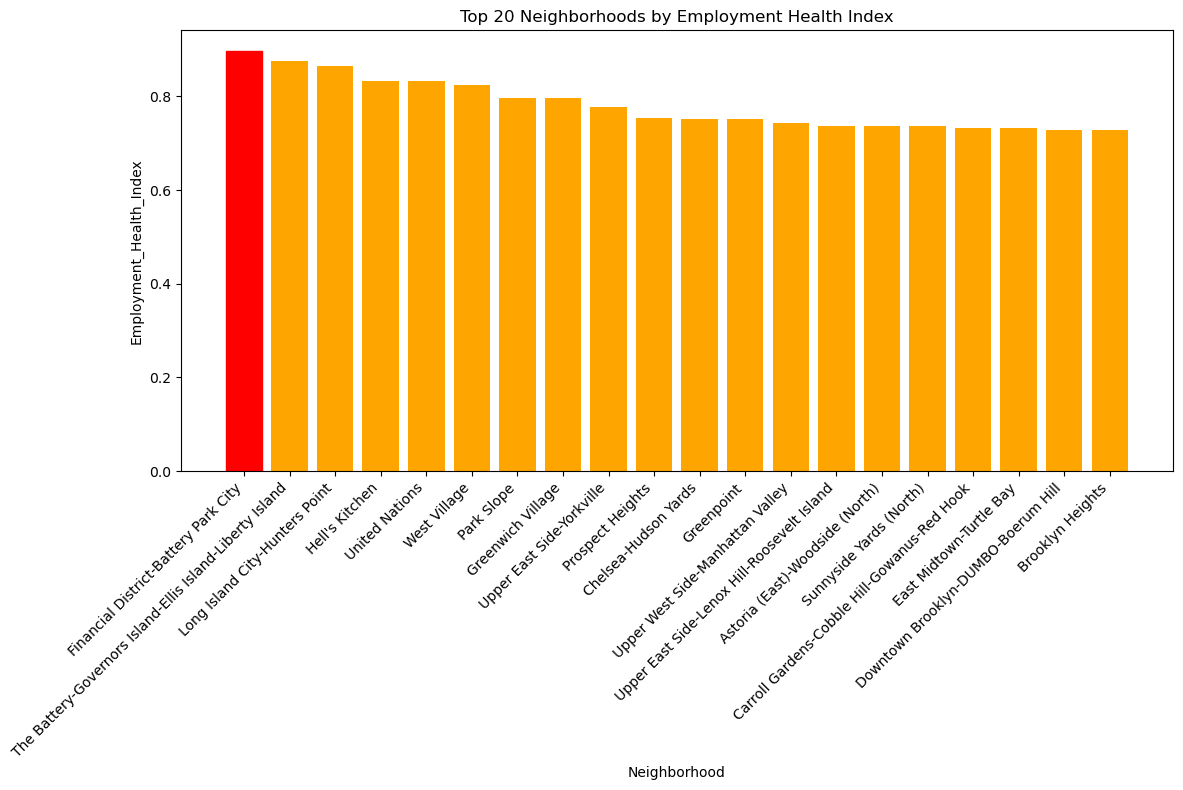

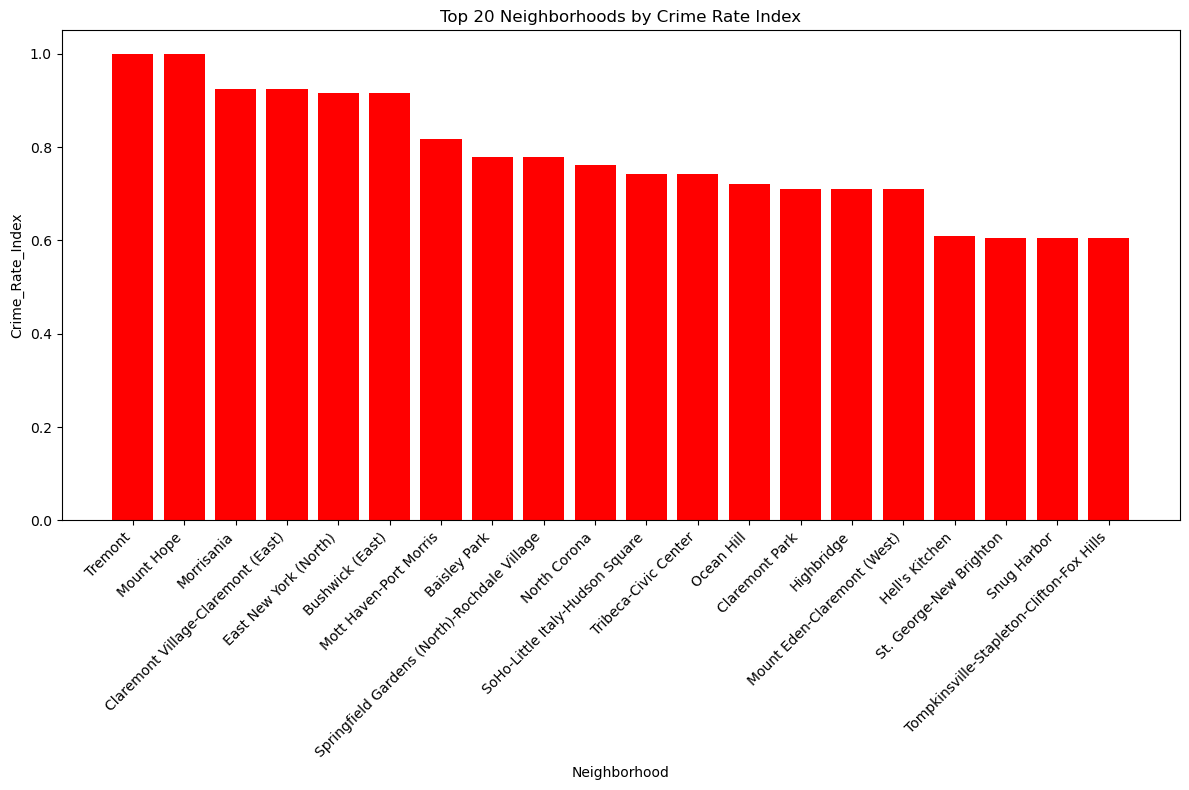

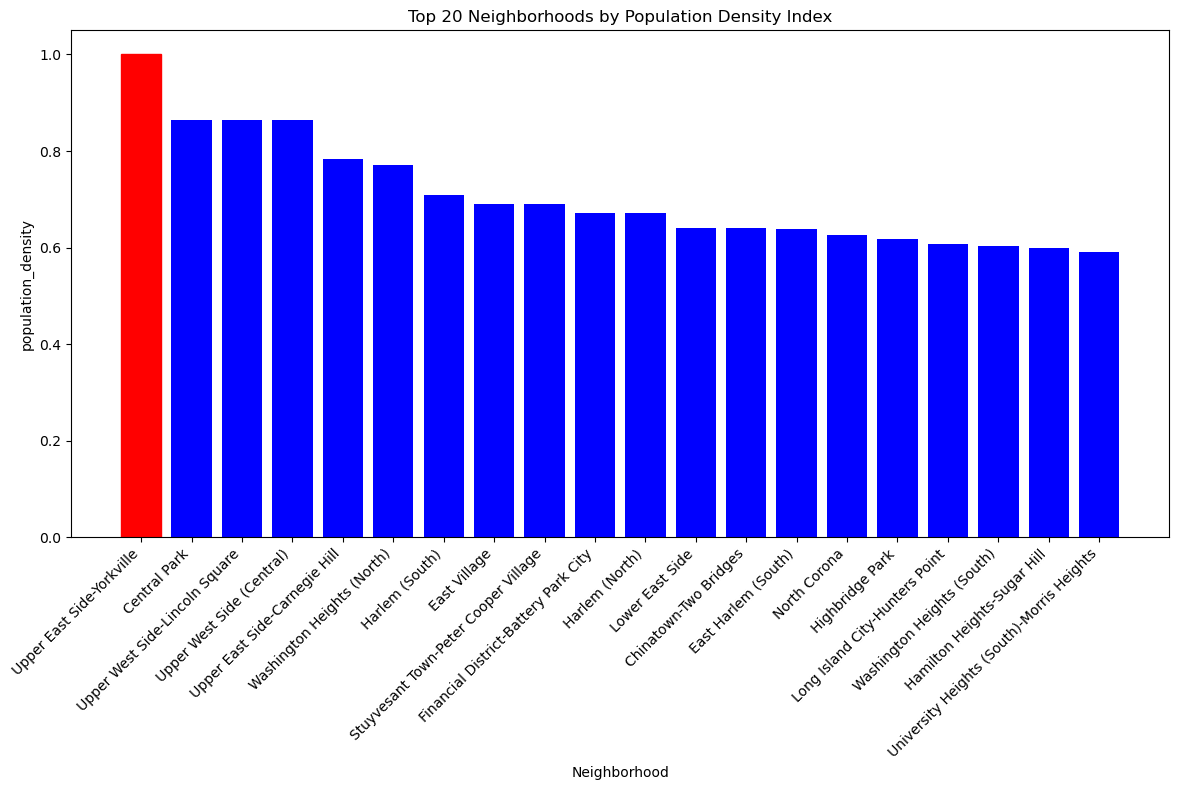

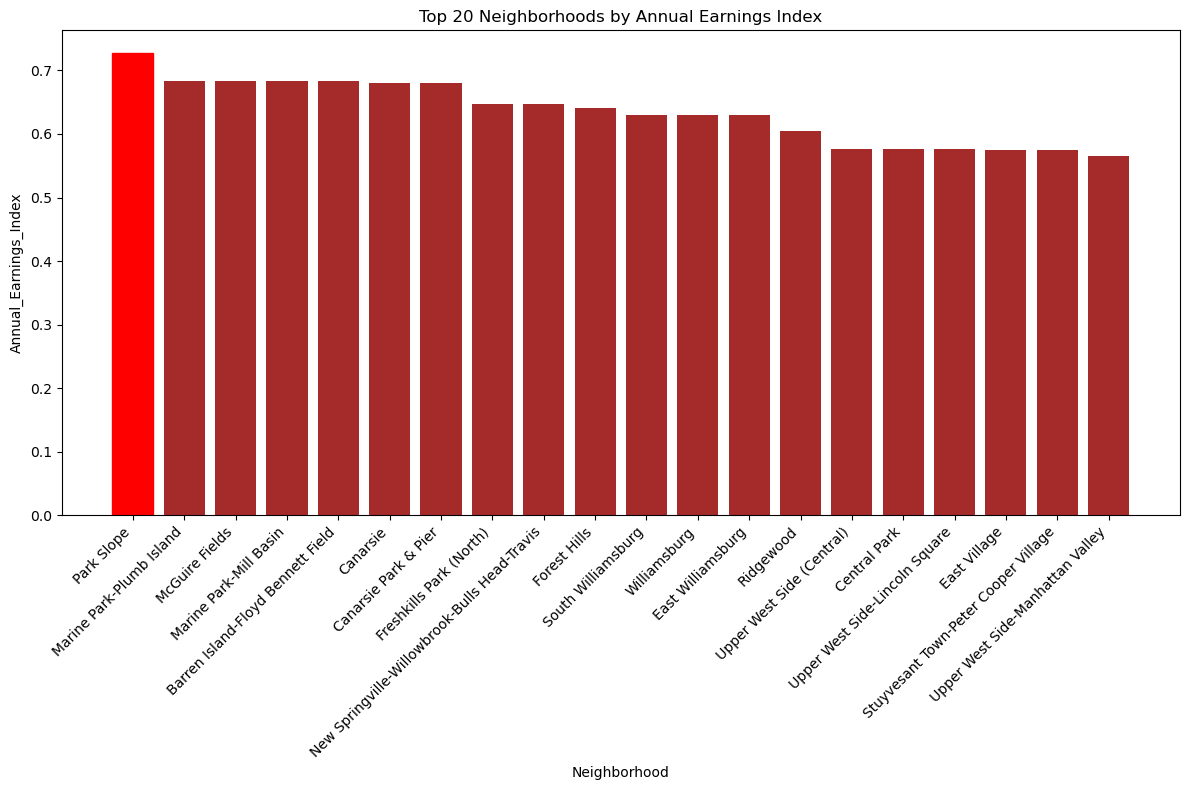

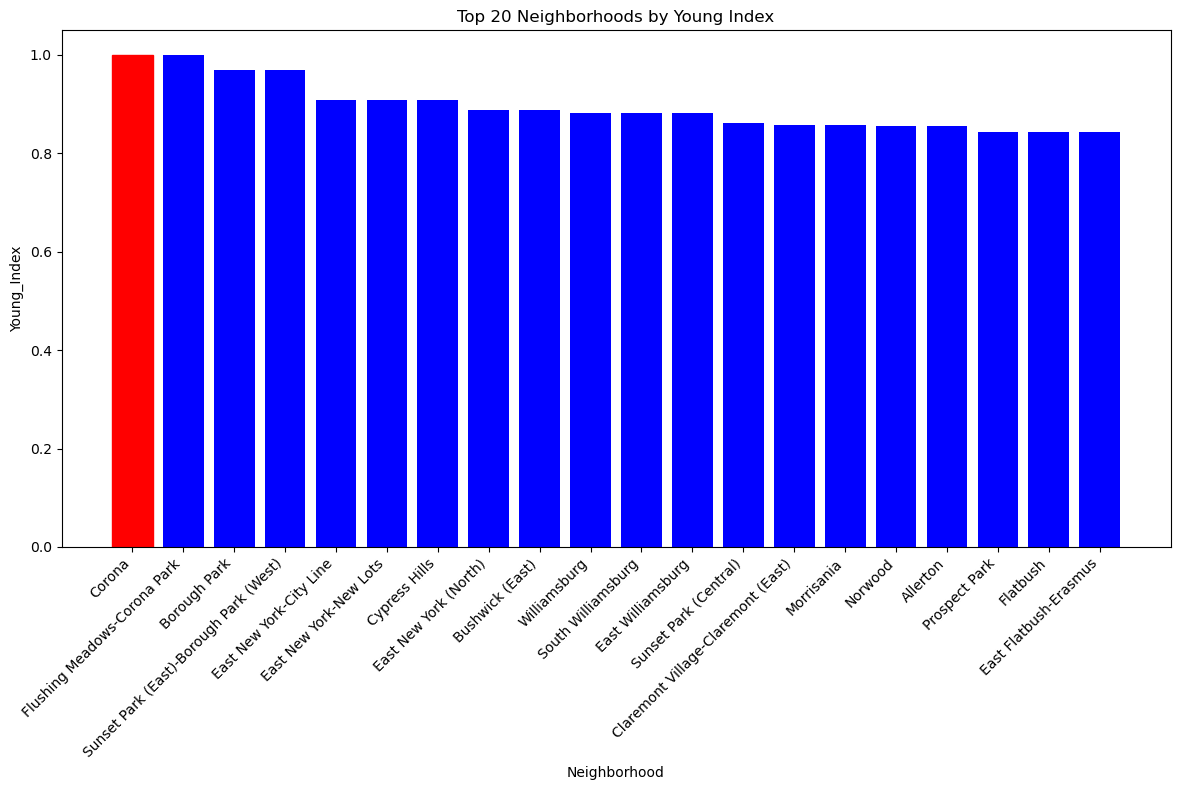

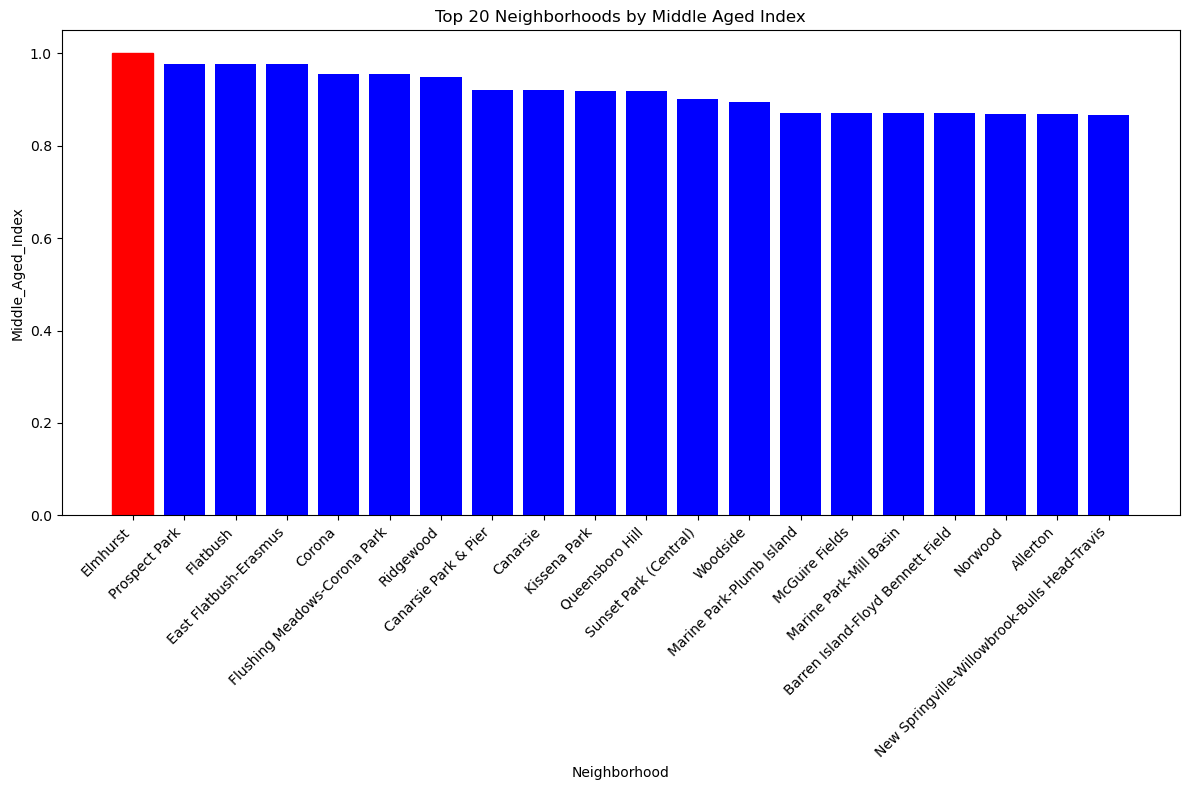

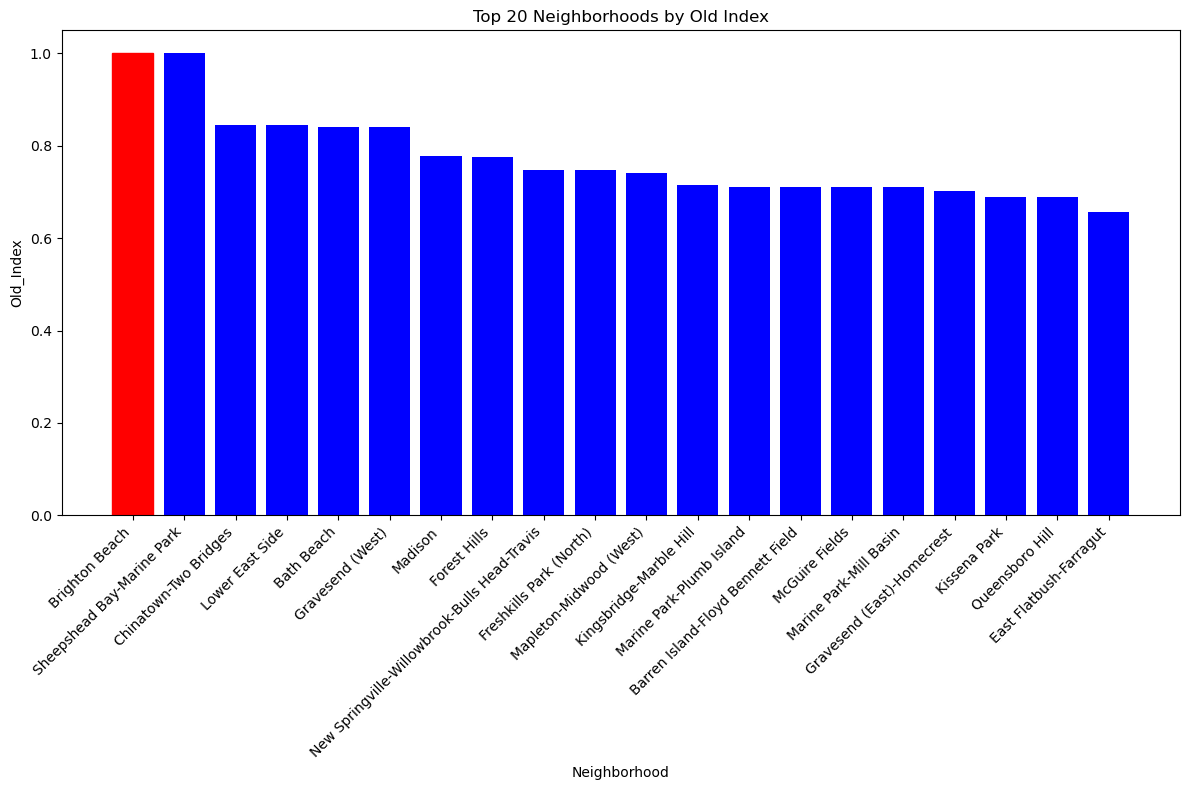

In [11]:
import matplotlib.pyplot as plt

def plot_top_20_index(df, index_column, title, color='blue', highlight_max=True):
    # Sort by the given index and select the top 20
    top_df = df.sort_values(index_column, ascending=False).head(20)

    # Create a bar chart
    plt.figure(figsize=(12, 8))
    bars = plt.bar(top_df['name'], top_df[index_column], color=color)
    if highlight_max:
        bars[0].set_color('red')  # Highlight the highest value in red
    plt.xlabel('Neighborhood')
    plt.ylabel(index_column)
    plt.title(f'Top 20 Neighborhoods by {title}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

# Plot for Age Diversity Index
plot_top_20_index(merged_df, 'Age_Diversity_Index', 'Age Diversity Index', color='green')

# Plot for Housing Affordability Index
plot_top_20_index(merged_df, 'Housing_Affordability_Index', 'Housing Affordability Index', color='purple')

# Plot for Employment Health Index
plot_top_20_index(merged_df, 'Employment_Health_Index', 'Employment Health Index', color='orange')

# Plot for Crime Rate Index
plot_top_20_index(merged_df, 'Crime_Rate_Index', 'Crime Rate Index', color='red', highlight_max=False)

# Plot for Population Density Index
plot_top_20_index(merged_df, 'population_density', 'Population Density Index', color='blue')

# Plot for Annual Earnings Index
plot_top_20_index(merged_df, 'Annual_Earnings_Index', 'Annual Earnings Index', color='brown')

plot_top_20_index(merged_df, 'Young_Index', 'Young Index', color='blue')

plot_top_20_index(merged_df, 'Middle_Aged_Index', 'Middle Aged Index', color='blue')

plot_top_20_index(merged_df, 'Old_Index', 'Old Index', color='blue')


# Save the merged DataFrame to a csv file




In [12]:
final_columns = [
    "neighbourhood_id",
    "population_density",
    "population_by_gender_Data_Male",
    "population_by_gender_Data_Female",
    "Age_Diversity_Index",
    "Employment_Health_Index",
    "Annual_Earnings_Index",
    "Housing_Affordability_Index",
    "Crime_Rate_Index",
    "Young_Index",
    "Middle_Aged_Index",
    "Old_Index"
]

merged_df = merged_df[final_columns]


In [16]:

# 'ascending=False' because a higher index value might be better, adjust as needed
for column in final_columns[1:]:  # Skip the first column which is 'neighbourhood_id'
    merged_df[column + "_Rank"] = merged_df[column].rank(method='min', ascending=False)
# Select only the neighbourhood ID and the rankings
rank_columns = ['neighbourhood_id'] + [col + "_Rank" for col in final_columns[1:]]
final_df = merged_df[rank_columns]

print(final_df.head())

#save to json as an array of objects

final_df.to_json('final_data_rankings.json', orient='records')


   neighbourhood_id  population_density_Rank  \
0                 1                    155.0   
1                 7                     88.0   
2                 5                    115.0   
3                 2                    105.0   
4                 8                     88.0   

   population_by_gender_Data_Male_Rank  population_by_gender_Data_Female_Rank  \
0                                158.0                                  171.0   
1                                152.0                                  139.0   
2                                115.0                                  114.0   
3                                 14.0                                   28.0   
4                                152.0                                  139.0   

   Age_Diversity_Index_Rank  Employment_Health_Index_Rank  \
0                      88.0                          12.0   
1                     128.0                          81.0   
2                      85.0              